In [1]:
import os
import csv
import torch
import time as timer
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

from utils import make_folder
from forcing_functions import get_function
from siren import EarlyStopper, get_4_dof_model, latin_hypercube_1D, system_ode_loss
from finite_element_code import set_up_4_dof, get_mck, integrate_rk4

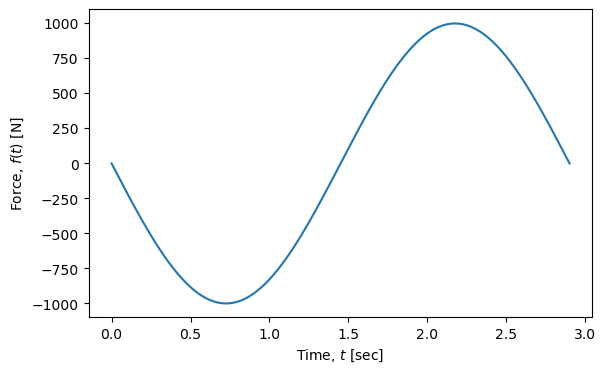

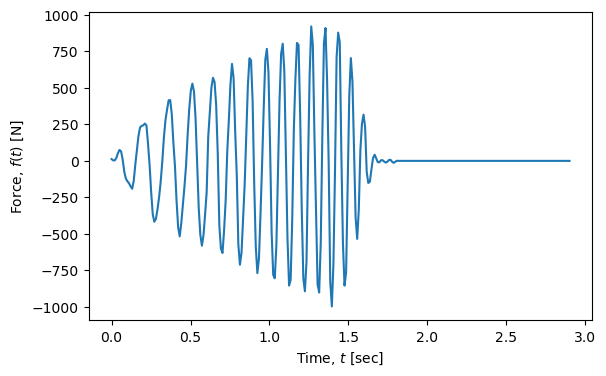

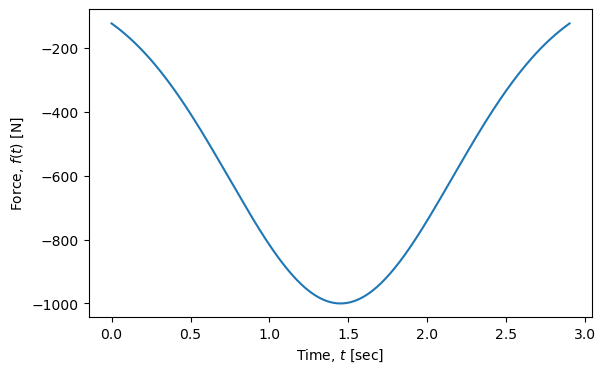

In [18]:
t0 = 0
t1 = 2.9
ntc = 290
ntp = int((t1 - t0) * 500)
tc = torch.linspace(t0, t1, ntc, device="cuda")
tp = latin_hypercube_1D(t0, t1, ntp, device="cuda")

alpha = 1e-14  # physics loss weight

learning_rate = 1e-4
max_iterations = 15_000
iterations_til_summary = 1000  # print summary every 1000 iterations

sine = get_function(
    name="sine",
    t0=t0,
    t1=t1,
    amplitude=-1e3,
    total_dimensions=1,
    force_dimension=0,
)
chirp = get_function(
    name="chirp",
    t0=t0,
    t1=t1,
    amplitude=-1e3,
    total_dimensions=1,
    force_dimension=0,
)
gaussian = get_function(
    name="gaussian",
    t0=t0,
    t1=t1,
    amplitude=-1e3,
    total_dimensions=1,
    force_dimension=0,
)

t = torch.linspace(t0, t1, ntc)
sine_pts = sine(t).cpu().flatten()

fig = plt.figure(figsize=(6.5, 4))
plt.plot(t, sine_pts)
plt.xlabel("Time, $t$ [sec]")
plt.ylabel("Force, $f(t)$ [N]")
plt.savefig("sine.png")

chirp_pts = chirp(t).cpu().flatten()

fig = plt.figure(figsize=(6.5, 4))
plt.plot(t, chirp_pts)
plt.xlabel("Time, $t$ [sec]")
plt.ylabel("Force, $f(t)$ [N]")
plt.savefig("chirp.png")

gaussian_pts = gaussian(t).cpu().flatten()

fig = plt.figure(figsize=(6.5, 4))
plt.plot(t, gaussian_pts)
plt.xlabel("Time, $t$ [sec]")
plt.ylabel("Force, $f(t)$ [N]")
plt.savefig("gaussian.png")